<a href="https://colab.research.google.com/github/shineloveyc/DS_take_home_challenge/blob/main/conversion_rate/conversion_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#since all dataset saving in the google drive, so need to mount to load the data
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/'
os.chdir(base_dir)
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive/My Drive/Colab Notebooks'

In [5]:
data_name = 'data/conversion_data.csv'
data_path = base_dir + data_name

In [6]:
import pandas as pd
df = pd.read_csv(data_path)

In [7]:
df.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [8]:
#explore the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


There is no missing value, so no imputation needed.

In [9]:
#get stat of the dataset
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [19]:
#check how many country
df['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [20]:
#check source
df['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

1. Data EDA

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
sns.set(rc={'figure.figsize':(15, 8.27)})
sns.set(style='ticks', palette='pastel')

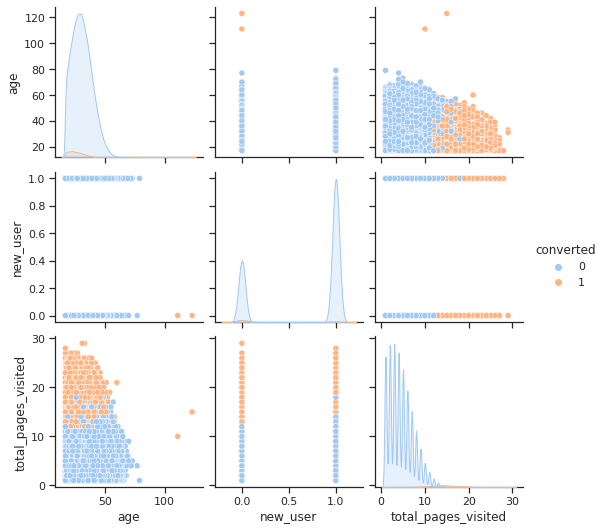

In [14]:
#Visualizing the multidimensional relationships
sns.pairplot(df, hue='converted', height=2.5)

In [24]:
#data correlation
corr_matrix = df.corr()
corr_matrix['converted'].sort_values(ascending = False)

converted              1.000000
total_pages_visited    0.528994
age                   -0.088797
new_user              -0.152374
Name: converted, dtype: float64

2. Feature Engineering

In [11]:
#divide age to group
def create_group(age):
  if age < 18:
    group = '<18'
  elif age<=24 and age>=18:
    group = '18-24'
  elif age<=34 and age>=25:
    group = '25-34'
  elif age <=44 and age >=35:
    group = '35-44'
  elif age <= 54 and age>=45:
    group = '45-54'
  elif age <=64 and age >=55:
    group = '55-64'
  else:
    group = '65+'
  return group

In [15]:
df['age_group'] = df['age'].apply(create_group)

Text(0.5, 1.0, 'Boxplot of Total Page Visited across age groups by converted or not converted')

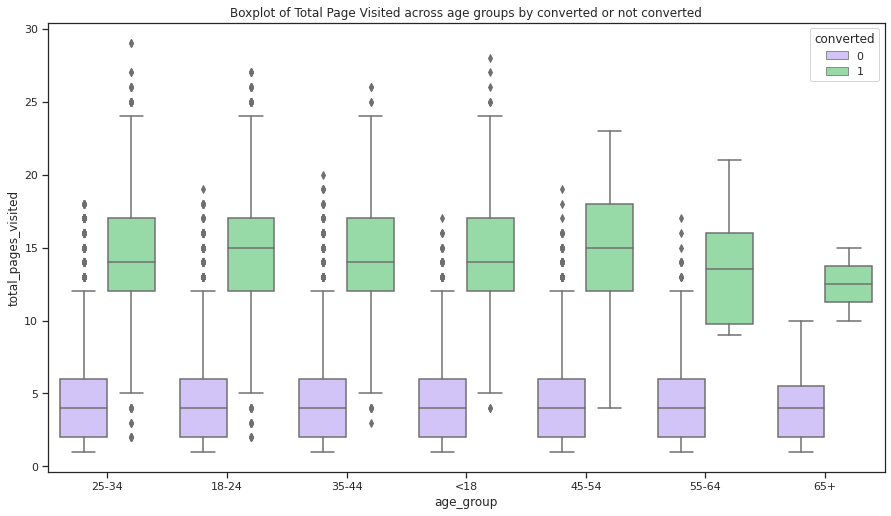

In [18]:
#using boxplot to further explore the data
sns.boxplot(x = 'age_group', y = 'total_pages_visited', hue='converted', palette=['m', 'g'], data = df)
plt.title('Boxplot of Total Page Visited across age groups by converted or not converted')

The more pages visited, the higher rate of convertion.

3. Data Prep

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

In [31]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [32]:
print('size of trian set: ', len(train_set))
print('size of test set: ', len(test_set))

size of trian set:  252960
size of test set:  63240


In [34]:
train_df = train_set.drop(['converted','age'], axis = 1)
train_label = train_set['converted'].copy()

In [35]:
#process categorical data
cat_col = ['country', 'new_user', 'source', 'age_group']

In [36]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

train_cat_1hot = one_hot_encoder.fit_transform(train_set[cat_col])

In [37]:
#log transfer the page visited since the data is left skew
train_df['total_pages_visited'] = np.log(train_df['total_pages_visited'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


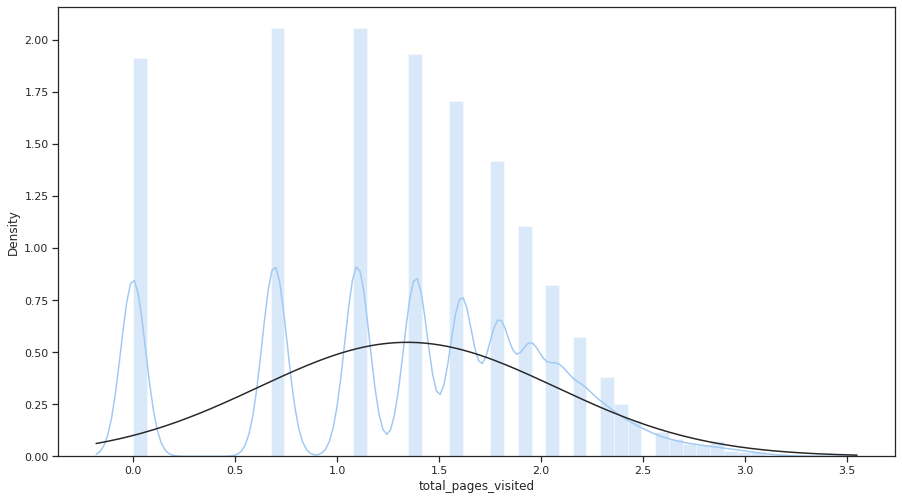

<Figure size 1080x595.44 with 0 Axes>

In [40]:
sns.distplot(train_df['total_pages_visited'], fit=norm)
fig = plt.figure()